In [1]:
import pandas as pd
import pickle
import os
import re
import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt  
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Load data into a dataframe
df = pd.read_csv('adult19.csv')
df.shape

(31997, 534)

In [3]:
#View starting Data
df.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13


In [4]:
#summary stats for difficulty walking before data cleaning
df["DIFF_A"].describe()

count    31997.000000
mean         1.304591
std          0.653480
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: DIFF_A, dtype: float64

<AxesSubplot:ylabel='Frequency'>

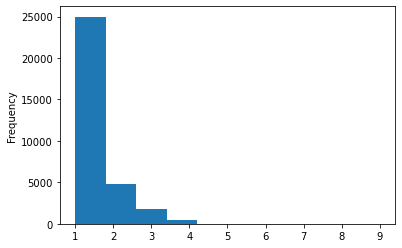

In [5]:
#summary figure for difficulty walking before data cleaning
df["DIFF_A"].plot(kind='hist')

In [6]:
#summary stats for education level before data cleaning
df["EDUC_A"].describe()

count    31997.000000
mean         6.352721
std          7.330429
min          0.000000
25%          4.000000
50%          5.000000
75%          8.000000
max         99.000000
Name: EDUC_A, dtype: float64

<AxesSubplot:ylabel='Frequency'>

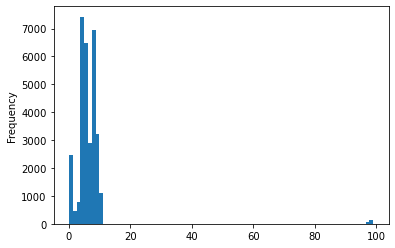

In [7]:
#summary figure for education level before data cleaning
df["EDUC_A"].plot(kind='hist',bins=80)

In [8]:
#summary stats for income before data cleaning
df["FAMINCTC_A"].describe()

count     31997.000000
mean      73261.058037
std       56695.574745
min           0.000000
25%       30000.000000
50%       60000.000000
75%      100000.000000
max      220000.000000
Name: FAMINCTC_A, dtype: float64

<AxesSubplot:ylabel='Frequency'>

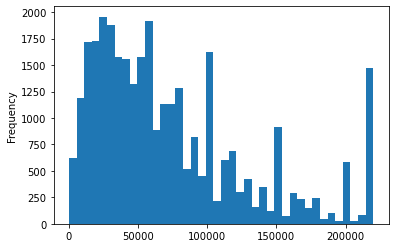

In [9]:
#summary figure for income before data cleaning
df["FAMINCTC_A"].plot(kind='hist', bins=40)

In [10]:
#summary stats for pain before data cleaning
df["PAIFRQ3M_A"].describe()

count    31840.000000
mean         2.091771
std          1.276890
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: PAIFRQ3M_A, dtype: float64

<AxesSubplot:ylabel='Frequency'>

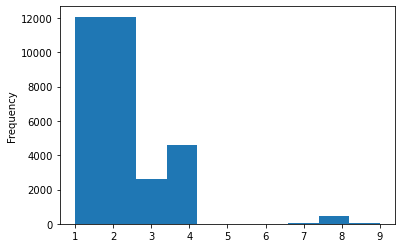

In [11]:
#summary figure for pain before data cleaning
df["PAIFRQ3M_A"].plot(kind='hist')

In [12]:
#summary stats for depression medication before data cleaning
df["DEPMED_A"].describe()

count    31997.000000
mean         1.988936
std          0.827965
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: DEPMED_A, dtype: float64

<AxesSubplot:ylabel='Frequency'>

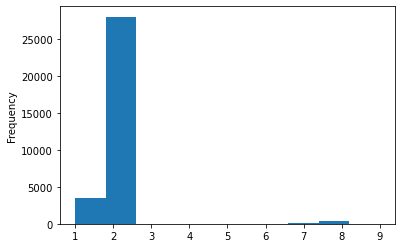

In [13]:
#summary figure for depression medication before data cleaning
df["DEPMED_A"].plot(kind='hist')

In [14]:
#Reduce the dataframe to what will be used
df = df[['DIFF_A', 'EDUC_A', 'FAMINCTC_A', 'PAIFRQ3M_A', 'DEPMED_A']].dropna()
df.shape

(31840, 5)

In [15]:
#Rename Colmns
df.rename({'DIFF_A': 'Diff_Walk', 'EDUC_A': 'Edu_Level','FAMINCTC_A': 'Fam_Income', 'PAIFRQ3M_A': 'Pain', 'DEPMED_A': 'Depress_Med'}, axis=1, inplace=True)
#View new dataframe
df.head()

,Diff_Walk,Edu_Level,Fam_Income,Pain,Depress_Med
0,1,7,60000,2.0,2
1,1,6,50000,1.0,2
2,1,5,65000,2.0,2
3,1,7,120000,2.0,2
4,2,5,30000,3.0,1


In [16]:
#Clean data

#DIFF_A: aka: Difficulty walking
#useful data were coded 1-4
#7 was used if refused, 8 Not Ascertained, and 9 Don't Know
df = df[df['Diff_Walk'] <= 4]

#EDUC_A: aka: Education level
#useful data were coded 1-11
#97 was used if refused, 98 Not Ascertained, and 99 Don't Know
df = df[df['Edu_Level'] <= 11]

#FAMINCTC_A: aka: Family Incomne
#All data ranges from 0-220000 
#Represents outcome in $
#220000 represents $220000 and up

#PAIFRQ3M_A: aka: How often had pain
#useful data were coded 1-4
#7 was used if refused, 8 Not Ascertained, and 9 Don't Know
df = df[df['Pain'] <= 4]

#DEPMED_A: aka: Do you take prescription medication for depression?
#useful data were coded 1-4
#7 was used if refused, 8 Not Ascertained, and 9 Don't Know
df = df[df['Depress_Med'] <= 2]

#Replace with 0 and 1 to represent True or False respectivly 
df['Depress_Med'] = (df['Depress_Med'] > 1).astype(int)




In [17]:
#view differnece
df.head()

,Diff_Walk,Edu_Level,Fam_Income,Pain,Depress_Med
0,1,7,60000,2.0,1
1,1,6,50000,1.0,1
2,1,5,65000,2.0,1
3,1,7,120000,2.0,1
4,2,5,30000,3.0,0


In [18]:
#summary stats for difficulty walking after data cleaning
df["Diff_Walk"].describe()

count    31081.000000
mean         1.298639
std          0.629345
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Diff_Walk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

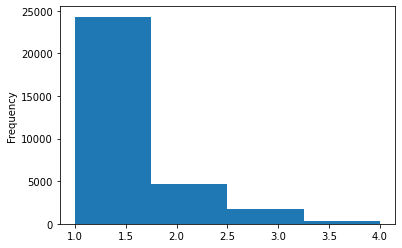

In [19]:
#summary figure for difficulty walking after data cleaning
df["Diff_Walk"].plot(kind='hist',bins=4)

In [20]:
#summary stats for education level after data cleaning
df["Edu_Level"].describe()

count    31081.000000
mean         5.844439
std          2.473937
min          0.000000
25%          4.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: Edu_Level, dtype: float64

<AxesSubplot:ylabel='Frequency'>

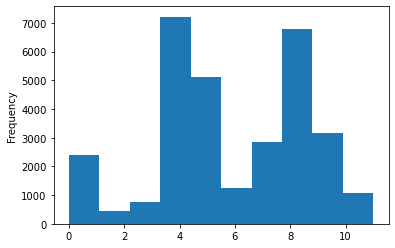

In [21]:
#summary figure for education level after data cleaning
df["Edu_Level"].plot(kind='hist',bins=10)

In [22]:
#summary stats for income after data cleaning
df["Fam_Income"].describe()

count     31081.000000
mean      73513.253209
std       56765.586414
min           0.000000
25%       30000.000000
50%       60000.000000
75%      100000.000000
max      220000.000000
Name: Fam_Income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

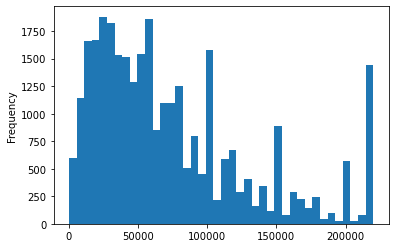

In [23]:
#summary figure for income after data cleaning
df["Fam_Income"].plot(kind='hist', bins=40)

In [24]:
#summary stats for pain after data cleaning
df["Pain"].describe()

count    31081.000000
mean         1.990348
std          1.025215
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Pain, dtype: float64

<AxesSubplot:ylabel='Frequency'>

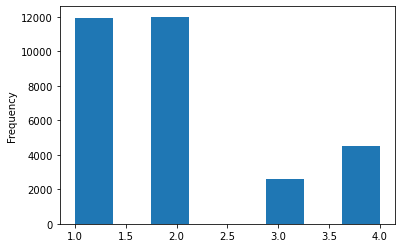

In [25]:
#summary figure for pain after data cleaning
df["Pain"].plot(kind='hist',bins=8)

In [26]:
#summary stats for depression medication after data cleaning
df["Depress_Med"].describe()

count    31081.000000
mean         0.890158
std          0.312698
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Depress_Med, dtype: float64

<AxesSubplot:ylabel='Frequency'>

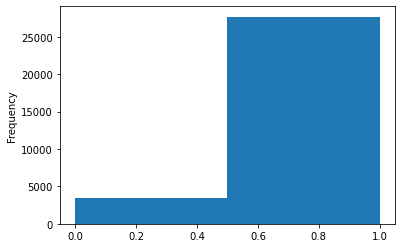

In [27]:
#summary figure for depression medication after data cleaning
df["Depress_Med"].plot(kind='hist',bins=2)

In [28]:
model_walk = smf.logit('Depress_Med ~ Diff_Walk', data=df).fit()
model_walk.summary()

Optimization terminated successfully.
         Current function value: 0.331862
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Depress_Med   No. Observations:                31081
Model:                          Logit   Df Residuals:                    31079
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                 0.04137
Time:                        15:17:37   Log-Likelihood:                -10315.
converged:                       True   LL-Null:                       -10760.
Covariance Type:            nonrobust   LLR p-value:                1.235e-195
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0960      0.039     78.866      0.000       3.019       3.173
Diff_Walk     -0.7068      0.022    -31.508      0.000      -0.751      -0.663
==============================================================================
"""

In [29]:
model_edu = smf.logit('Depress_Med ~ Edu_Level', data=df).fit()
model_edu.summary()

Optimization terminated successfully.
         Current function value: 0.345704
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Depress_Med   No. Observations:                31081
Model:                          Logit   Df Residuals:                    31079
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                0.001389
Time:                        15:17:38   Log-Likelihood:                -10745.
converged:                       True   LL-Null:                       -10760.
Covariance Type:            nonrobust   LLR p-value:                 4.586e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8627      0.045     41.316      0.000       1.774       1.951
Edu_Level      0.0400      0.007      5.473      0.000       0.026       0.054
==============================================================================
"""

In [30]:
model_income = smf.logit('Depress_Med ~ Fam_Income', data=df).fit()
model_income.summary()

Optimization terminated successfully.
         Current function value: 0.340874
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Depress_Med   No. Observations:                31081
Model:                          Logit   Df Residuals:                    31079
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                 0.01534
Time:                        15:17:38   Log-Likelihood:                -10595.
converged:                       True   LL-Null:                       -10760.
Covariance Type:            nonrobust   LLR p-value:                 8.899e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6612      0.029     56.955      0.000       1.604       1.718
Fam_Income  6.536e-06   3.85e-07     16.977      0.000    5.78e-06    7.29e-06
==============================================================================
"""

In [31]:
model_pain = smf.logit('Depress_Med ~ Pain', data=df).fit()
model_pain.summary()

Optimization terminated successfully.
         Current function value: 0.324629
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Depress_Med   No. Observations:                31081
Model:                          Logit   Df Residuals:                    31079
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                 0.06227
Time:                        15:17:38   Log-Likelihood:                -10090.
converged:                       True   LL-Null:                       -10760.
Covariance Type:            nonrobust   LLR p-value:                2.377e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4491      0.045     76.221      0.000       3.360       3.538
Pain          -0.6029      0.016    -36.736      0.000      -0.635      -0.571
==============================================================================
"""

In [32]:
#Combination
model_mix = smf.logit('Depress_Med ~ Diff_Walk + Edu_Level + Fam_Income + Pain', data=df).fit()
model_mix.summary()

Optimization terminated successfully.
         Current function value: 0.319172
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Depress_Med   No. Observations:                31081
Model:                          Logit   Df Residuals:                    31076
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                 0.07803
Time:                        15:17:39   Log-Likelihood:                -9920.2
converged:                       True   LL-Null:                       -10760.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6393      0.075     48.621      0.000       3.493       3.786
Diff_Walk     -0.3566      0.027    -13.398      0.000      -0.409      -0.304
Edu_Level     -0.0469      0.008     -5.601      0.000      -0.063      -0.030
Fam_Income  4.317e-06   4.23e-07     10.209      0.000    3.49e-06    5.15e-06
Pain          -0.4706      0.018    -25.484      0.000      -0.507      -0.434
==============================================================================
"""